# Getting predicions

This notebook load and use the **NF**, **NNclass**, and **NNgauss** models

considering the complete _input dataset_ of halo properties (_mass_, _concentration_, _spin_, _age_, and $\delta_3$) to

make predictions for the galaxy attributes (_stellar mass_, _color_, _sSFR_, and _radius_) as analized in the paper.

## Importing the libraries

In [1]:
from NF import NF
from NNgauss import NNgauss
from NNclass import NNclass
import pandas as pd
import matplotlib.pyplot as plt
import warnings

/Users/natalidesanti/env_pytorch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


GPU is not available. Using CPU instead.


In [2]:
warnings.filterwarnings('ignore')

## Loading data

In [3]:
dataset = pd.read_csv('data/subtest_tng300.csv')

In [4]:
dataset.head()

,ID,X_h,Y_h,Z_h,M_h,C_h,S_h,z_h,Delta3_h,x_g,y_g,z_g,smass,color,radius,sSFR
0,148942.0,37.155465,83.731352,156.890562,11.230634,0.949239,0.102213,0.909091,9.760820,37.155464,83.731354,156.890564,9.020804,0.441576,0.428343,-9.636042
1,143805.0,62.748066,184.040500,188.505172,11.193012,0.978603,0.057343,1.333333,1.123779,62.748066,184.040497,188.505173,8.825384,0.075232,0.266293,-9.731375
2,37609.0,191.439203,117.276422,130.288531,11.963388,1.061022,0.012275,1.575758,2.584691,191.439209,117.276421,130.288528,10.391277,1.130091,0.482415,-12.301883
3,48567.0,76.807563,143.693719,179.001844,11.788298,1.047671,0.069209,1.818182,0.915077,76.807564,143.693726,179.001846,10.166031,0.910177,0.774072,-11.408447
4,92208.0,177.415203,11.204672,30.818141,11.464064,1.117278,0.067701,2.242424,1.284318,177.415207,11.204672,30.818140,9.647124,1.016806,0.679863,-10.740095


## Selecting data

In [5]:
# Properties
target_props = ['smass', 'color', 'sSFR', 'radius']
input_props = ['M_h', 'C_h', 'S_h', 'z_h', 'Delta3_h']

input_data = dataset[input_props].to_numpy()

## Loading the models

The output shape is `(n_samples, n_simulations, n_dimensions)`


In [6]:
nngauss = NNgauss(target_props, trial = 45)
nf = NF(target_props, trial = 99)
nnclass = NNclass(target_props, trial = 77)

## Getting the predictions

Sampling from the loaded models

In [7]:
nngauss_pred = nngauss.get_sample(input_data, n_samples = 10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [8]:
nf_pred = nf.get_sample(input_data, n_samples = 10)

# instance: 0


In [9]:
nnclass_pred = nnclass.get_sample(input_data, num_domain_sample = 5, num_values_sample = 2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [10]:
nf_pred.shape, nngauss_pred.shape, nnclass_pred.shape

((10, 10, 4), (10, 10, 4), (10, 10, 4))

## Linear comparison

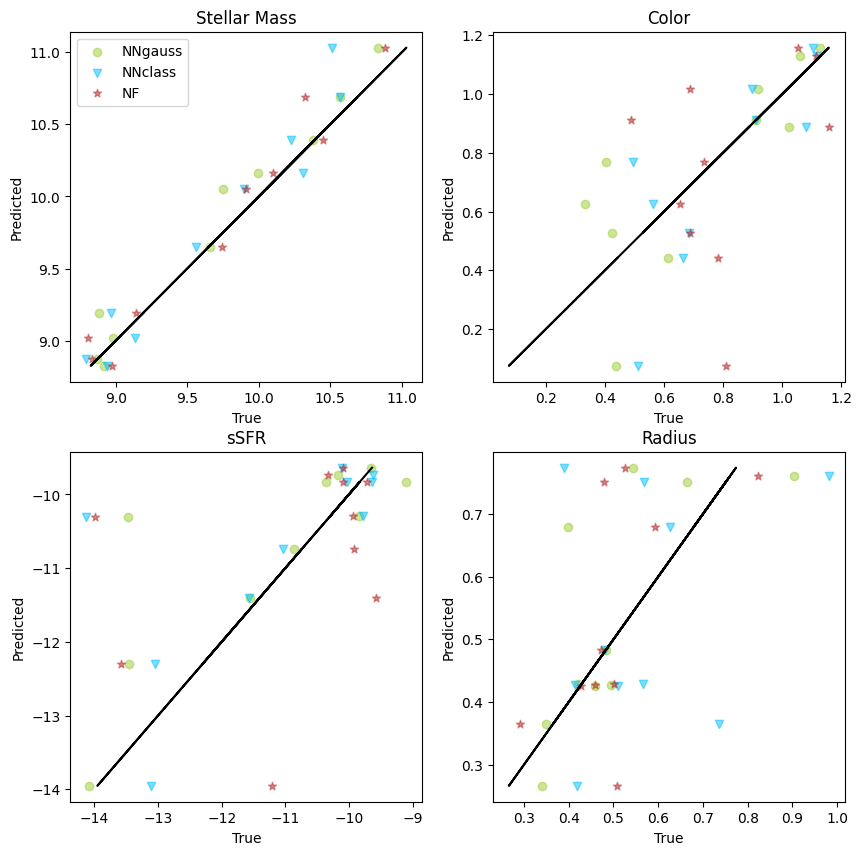

In [11]:
fig, axs = plt.subplots(2, 2, figsize = (10, 10), dpi=100)

# Stellar Mass
nf_smass = nf_pred[0, :, 0]
nngauss_smass = nngauss_pred[0, :, 0]
nnclass_smass = nnclass_pred[0, :, 0]

axs[0, 0].set_title('Stellar Mass')
axs[0, 0].plot(dataset['smass'], dataset['smass'], color='black')
axs[0, 0].scatter(nngauss_smass, dataset['smass'], color=nngauss.color, label=nngauss.label, marker=nngauss.marker, alpha=0.5)
axs[0, 0].scatter(nnclass_smass, dataset['smass'], color=nnclass.color, label=nnclass.label, marker=nnclass.marker, alpha=0.5)
axs[0, 0].scatter(nf_smass, dataset['smass'], color=nf.color, label=nf.label, marker=nf.marker, alpha=0.5)
axs[0, 0].legend()
axs[0, 0].set_ylabel('Predicted')
axs[0, 0].set_xlabel('True')

# Color
nf_color = nf_pred[0, :, 1]
nngauss_color = nngauss_pred[0, :, 1]
nnclass_color = nnclass_pred[0, :, 1]

axs[0, 1].set_title('Color')
axs[0, 1].plot(dataset['color'], dataset['color'], color='black')
axs[0, 1].scatter(nngauss_color, dataset['color'], color=nngauss.color, label=nngauss.label, marker=nngauss.marker, alpha=0.5)
axs[0, 1].scatter(nnclass_color, dataset['color'], color=nnclass.color, label=nnclass.label, marker=nnclass.marker, alpha=0.5)
axs[0, 1].scatter(nf_color, dataset['color'], color=nf.color, label=nf.label, marker=nf.marker, alpha=0.5)
axs[0, 1].set_ylabel('Predicted')
axs[0, 1].set_xlabel('True')

# sSFR
nf_sSFR = nf_pred[0, :, 2]
nngauss_sSFR = nngauss_pred[0, :, 2]
nnclass_sSFR = nnclass_pred[0, :, 2]

axs[1, 0].set_title('sSFR')
axs[1, 0].plot(dataset['sSFR'], dataset['sSFR'], color = 'black')
axs[1, 0].scatter(nngauss_sSFR, dataset['sSFR'], color=nngauss.color, label=nngauss.label, marker=nngauss.marker, alpha=0.5)
axs[1, 0].scatter(nnclass_sSFR, dataset['sSFR'], color=nnclass.color, label=nnclass.label, marker=nnclass.marker, alpha=0.5)
axs[1, 0].scatter(nf_sSFR, dataset['sSFR'], color=nf.color, label=nf.label, marker=nf.marker, alpha=0.5)
axs[1, 0].set_ylabel('Predicted')
axs[1, 0].set_xlabel('True')

# Radius
nf_radius = nf_pred[0, :, 3]
nngauss_radius = nngauss_pred[0, :, 3]
nnclass_radius = nnclass_pred[0, :, 3]

axs[1, 1].set_title('Radius')
axs[1, 1].plot(dataset['radius'], dataset['radius'], color='black')
axs[1, 1].scatter(nngauss_radius, dataset['radius'], color=nngauss.color, label=nngauss.label, marker=nngauss.marker, alpha=0.5)
axs[1, 1].scatter(nnclass_radius, dataset['radius'], color=nnclass.color, label=nnclass.label, marker=nnclass.marker, alpha=0.5)
axs[1, 1].scatter(nf_radius, dataset['radius'], color=nf.color, label=nf.label, marker=nf.marker, alpha = 0.5)
axs[1, 1].set_ylabel('Predicted')
axs[1, 1].set_xlabel('True')

plt.savefig('results/linear_comparison.png')